<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r6_i3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r6/4-fft-normal-n-0-6-9-15-r6.csv?token=AKVFSOFGWIU7WQL3IICWD2264IA6S')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r6/4-fft-malicious-n-0-6-9-15-m-1-11-r6.csv?token=AKVFSOFCR4YUVQAEH7IJA4264IA6U')


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [5]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,6,6,23,7,2,1,0,0.0,4,146,1,146,146,0,8,3,27,1
1,7,2,0,1,1,4,3,9,6,6,23,7,3,1,0,0.0,4,192,1,192,192,0,12,3,27,0
2,54,0,2,4,1,1,5,17,23,7,6,6,3,1,1,1.0,8,191,2,192,382,0,12,20,340,0
3,54,0,2,4,1,1,5,17,23,7,6,6,2,1,1,1.0,8,145,2,146,290,0,8,20,340,1
4,55,0,2,4,2,2,5,17,23,7,6,6,2,1,1,1.0,9,144,3,146,432,0,32,20,340,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281456,3279086,2,0,6,4,2,3,11,22,6,23,7,60217,1,0,0.0,25,5,10,14,50,0,2890416,18,198,0
281457,3279093,2,0,6,5,3,3,11,22,6,23,7,60217,1,0,0.0,32,4,11,14,44,0,5419530,18,198,0
281458,3279094,2,0,2,1,4,3,12,22,6,23,7,60218,1,0,0.0,32,3,12,14,36,0,481744,6,72,0
281459,3279095,2,0,7,1,4,3,9,22,6,15,15,60217,3,0,0.0,5,2,13,14,26,0,1686076,21,189,0


In [6]:
df.shape

(281461, 26)

Test Data

In [0]:
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r6/4-fft-malicious-n-0-6-9-15-m-1-12-r6.csv?token=AKVFSOE74S6OVNYGLW35I5S64IA62')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r6/4-fft-malicious-n-0-6-9-15-m-1-7-r6.csv?token=AKVFSOBOGMIEARZA7GYQFFK64IA66')
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r6/4-fft-malicious-n-0-6-9-15-m-11-12-r6.csv?token=AKVFSOBV6TIE2PVMLDJP3MC64IA7E')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r6/4-fft-malicious-n-0-6-9-15-m-7-11-r6.csv?token=AKVFSOC43VEQFYVPAG6RWZC64IA7K')
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/iter-3/r6/4-fft-malicious-n-0-6-9-15-m-7-12-r6.csv?token=AKVFSOBIVHJPJLC3NTFQUU264IA7S')

In [8]:
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)

(157020, 26)
(178016, 26)
(158306, 26)
(179142, 26)
(176569, 26)


Processing

In [9]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [11]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.196413,-0.057377,-0.015584,0.023748,-0.182106,-0.151814,0.008528,0.278601,-0.487615,-0.709676,-0.077628,0.006904,0.016504,0.017625,0.024036,0.441224,-0.000972,-0.192099,-0.193613,-0.026484
inport,-0.196413,1.000000,-0.019199,-0.010141,0.015454,0.305143,0.224379,-0.022501,0.450537,0.574959,0.489511,-0.009940,-0.010138,-0.018160,-0.021307,-0.003863,0.665173,-0.024807,0.225921,0.270535,-0.068741
cache_coherence_type,-0.057377,-0.019199,1.000000,0.215139,-0.327848,-0.243105,-0.271794,0.041041,-0.118314,-0.054617,-0.030533,-0.177023,0.025110,-0.003236,0.016470,0.014174,-0.061000,0.287331,0.639316,0.118106,0.000314
flit_id,-0.015584,-0.010141,0.215139,1.000000,-0.005463,0.211862,0.202107,0.004929,0.028331,0.008703,-0.005396,0.387041,-0.019138,0.011060,-0.006082,-0.005068,-0.032229,0.631002,0.346951,0.296959,0.001863
flit_type,0.023748,0.015454,-0.327848,-0.005463,1.000000,-0.322853,-0.307988,-0.007511,-0.043173,-0.013263,0.008223,0.404357,-0.013021,0.025633,0.009496,0.008425,0.049113,0.143253,-0.528714,-0.452531,-0.002839
vnet,-0.182106,0.305143,-0.243105,0.211862,-0.322853,1.000000,0.976057,-0.039891,0.263567,0.327890,0.373964,-0.370626,-0.044191,0.000969,-0.032545,-0.027053,0.169793,-0.050847,0.590455,0.928671,-0.000157
vc,-0.151814,0.224379,-0.271794,0.202107,-0.307988,0.976057,1.000000,-0.042551,0.213782,0.231749,0.282280,-0.355914,-0.042835,0.006420,-0.027418,-0.023470,0.111310,-0.060776,0.547604,0.915709,0.002228
traversal_id,0.008528,-0.022501,0.041041,0.004929,-0.007511,-0.039891,-0.042551,1.000000,-0.008142,-0.008928,-0.012220,0.038915,0.090566,0.091570,0.137139,0.069880,0.002548,0.562247,0.002525,-0.027632,-0.305510
hop_count,0.278601,0.450537,-0.118314,0.028331,-0.043173,0.263567,0.213782,-0.008142,1.000000,0.514013,0.054138,0.037367,-0.054399,-0.052624,-0.080583,-0.052438,0.585862,-0.033335,0.110495,0.204127,-0.034329
current_hop,-0.487615,0.574959,-0.054617,0.008703,-0.013263,0.327890,0.231749,-0.008928,0.514013,1.000000,0.814400,0.159355,-0.020805,-0.031293,-0.039227,-0.027567,0.222214,-0.029636,0.214483,0.271526,-0.025964


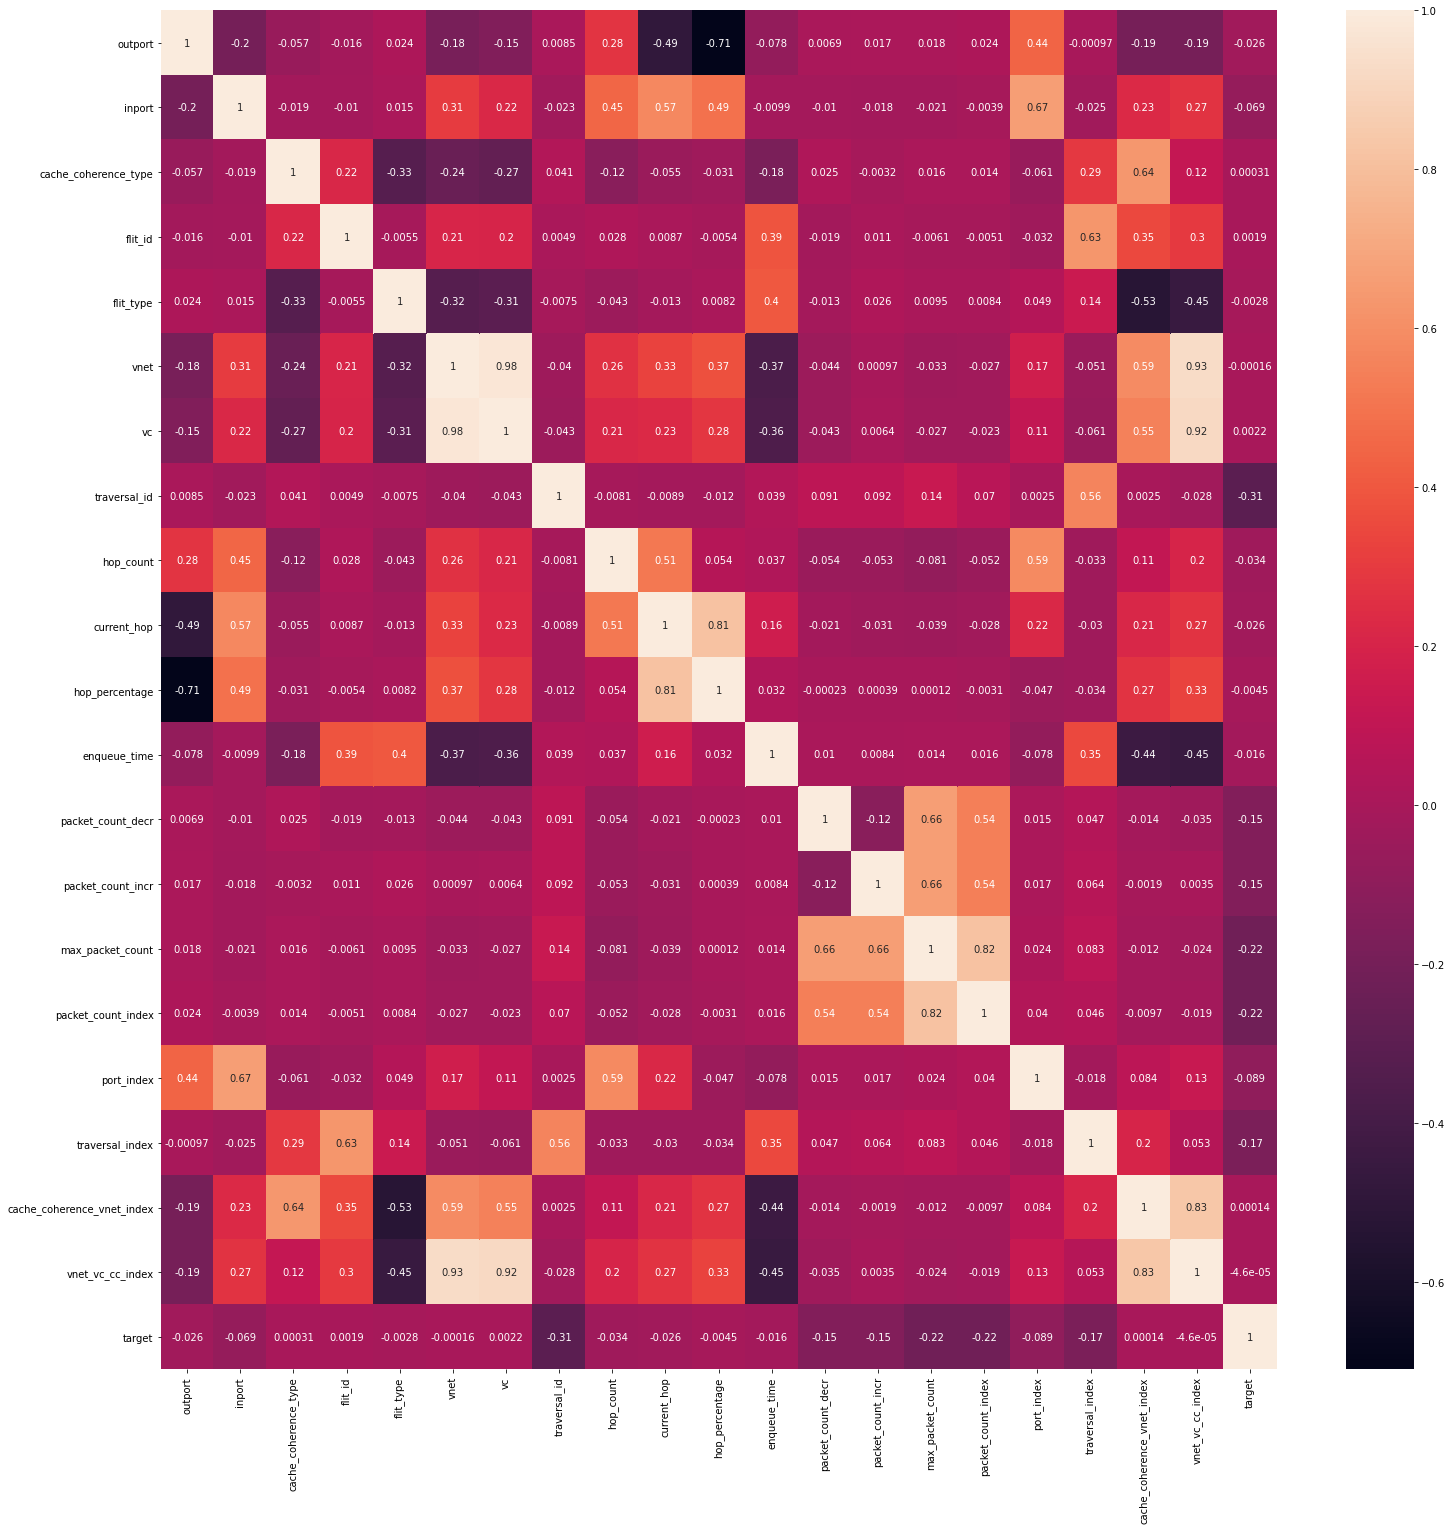

In [12]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [14]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'vnet']

In [0]:
df = df.drop(columns=['inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])

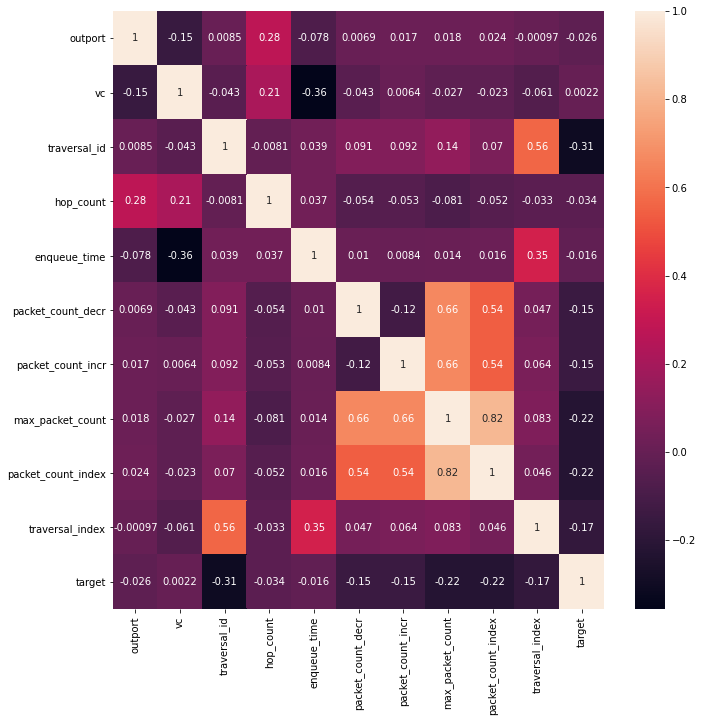

In [16]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), annot = True)
plt.show()

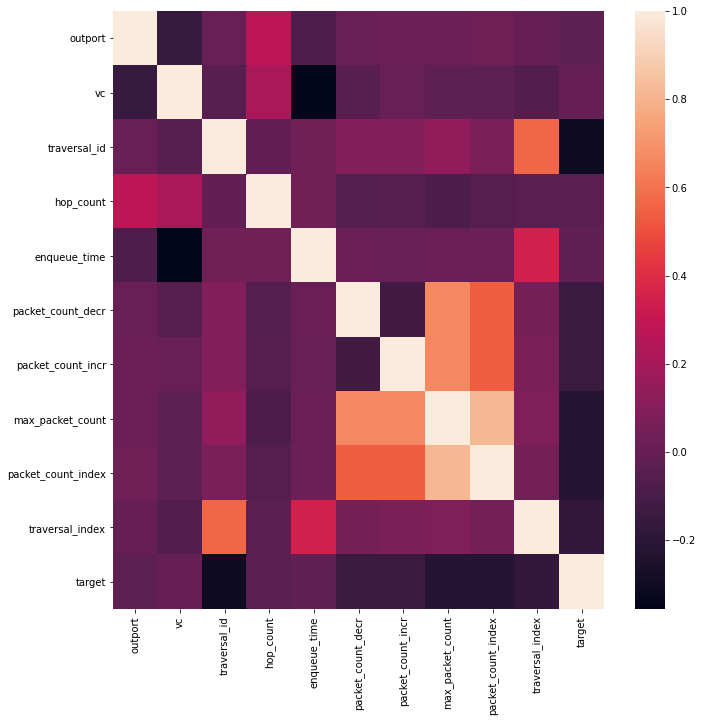

In [17]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [19]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.5,0.000000,0.000017,0.2,0.000000,0.481728,0.000000,0.481728,0.006318,7.380719e-07
1,0.5,0.000000,0.000033,0.2,0.000000,0.634551,0.000000,0.634551,0.008322,1.476144e-06
2,0.0,0.888889,0.000033,0.2,0.062500,0.631229,0.003322,0.634551,0.016601,1.476144e-06
3,0.0,0.888889,0.000017,0.2,0.062500,0.478405,0.003322,0.481728,0.012592,7.380719e-07
4,0.0,0.888889,0.000017,0.2,0.078125,0.475083,0.006645,0.481728,0.018779,5.166503e-06
...,...,...,...,...,...,...,...,...,...,...
281456,0.5,0.222222,0.999983,0.2,0.328125,0.013289,0.029900,0.043189,0.002135,5.333330e-01
281457,0.5,0.222222,0.999983,0.2,0.437500,0.009967,0.033223,0.043189,0.001874,1.000000e+00
281458,0.5,0.333333,1.000000,0.2,0.437500,0.006645,0.036545,0.043189,0.001525,8.888969e-02
281459,0.5,0.000000,0.999983,0.6,0.015625,0.003322,0.039867,0.043189,0.001089,3.111106e-01


In [20]:
train_X[train_X.duplicated()].shape

(0, 10)

In [21]:
test_X = df3.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y = df3['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 10)


,outport,vc,traversal_id,hop_count,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,traversal_index
0,0.5,0.000000,0.000033,0.2,0.000000,0.668831,0.000000,0.668831,0.008575,0.000001
1,0.0,0.888889,0.000033,0.2,0.057971,0.665584,0.003247,0.668831,0.017108,0.000001
2,0.0,0.888889,0.000033,0.2,0.072464,0.662338,0.006494,0.668831,0.025558,0.000008
3,0.0,0.888889,0.000033,0.2,0.086957,0.659091,0.009740,0.668831,0.033924,0.000013
4,0.0,0.888889,0.000033,0.2,0.101449,0.655844,0.012987,0.668831,0.042208,0.000017
...,...,...,...,...,...,...,...,...,...,...
157015,0.5,0.111111,0.999983,0.2,0.202899,0.012987,0.081169,0.094156,0.005370,0.400000
157016,0.5,0.111111,0.999983,0.2,0.304348,0.009740,0.084416,0.094156,0.004454,0.533333
157017,0.5,0.111111,0.999983,0.2,0.405797,0.006494,0.087662,0.094156,0.003455,1.000000
157018,0.5,0.222222,1.000000,0.2,0.405797,0.003247,0.090909,0.094156,0.002373,0.088890


In [22]:
test_X1 = df4.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y1 = df4['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 10)


In [23]:
test_X2 = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y2 = df5['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 10)


In [24]:
test_X3 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y3 = df6['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 10)


In [25]:
test_X4 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router','inport','cache_coherence_type','flit_id','flit_type','vnet','current_hop','hop_percentage','port_index','cache_coherence_vnet_index','vnet_vc_cc_index'])
test_Y4 = df7['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 10)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

Labels

1.   0 -  malicious
2.   1 -  good



In [27]:
train_Y = df['target']
train_Y.value_counts()

0    159514
1    121947
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.33, random_state=seed, shuffle=True)

Feature Selection

                Specs        Score
2        traversal_id  2885.961236
8  packet_count_index  1412.595283
7    max_packet_count  1146.943587
9     traversal_index   913.911456
5   packet_count_decr   581.765594
6   packet_count_incr   565.237064
0             outport    41.211917
3           hop_count    26.409025
4        enqueue_time     5.848358
1                  vc     0.498365


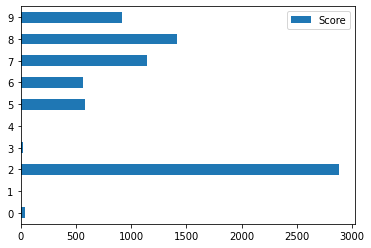

In [30]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k='all')
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [32]:
dt = DecisionTreeClassifier(max_depth=20,max_features=10,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r1.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [35]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 97.89052805735558
Test Prediction Score 97.619585930687


In [36]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 82.76397911094128
Test Prediction Score 84.76204386122596
Test Prediction Score 81.57176607330108
Test Prediction Score 84.08022685913967
Test Prediction Score 82.48220242511425


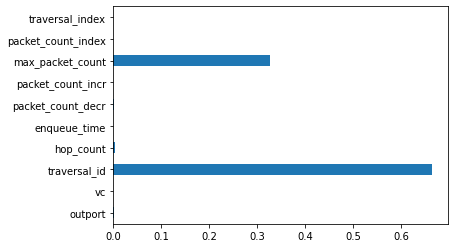

In [37]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

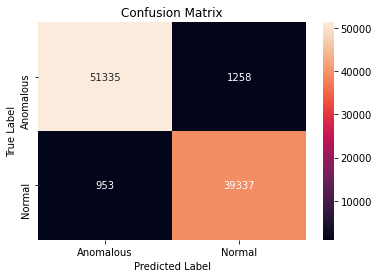

In [38]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [39]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     52593
           1       0.97      0.98      0.97     40290

    accuracy                           0.98     92883
   macro avg       0.98      0.98      0.98     92883
weighted avg       0.98      0.98      0.98     92883



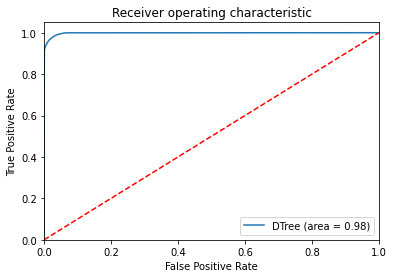

In [40]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [42]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
pickle.dump(xgbc, open("xgbc-r6l-i3.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [45]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 100.0
Test Prediction Score 99.89987403507638


In [46]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 82.90727295885874
Test Prediction Score 86.31696027323386
Test Prediction Score 83.08086869733302
Test Prediction Score 85.56452423217335
Test Prediction Score 83.64718608589277


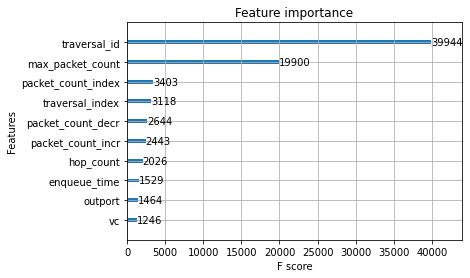

In [47]:
plot_importance(xgbc)
plt.show()

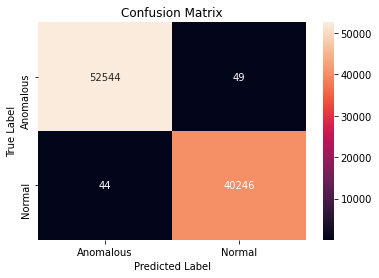

In [48]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [49]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52593
           1       1.00      1.00      1.00     40290

    accuracy                           1.00     92883
   macro avg       1.00      1.00      1.00     92883
weighted avg       1.00      1.00      1.00     92883



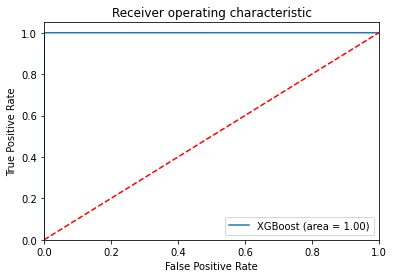

In [50]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()